<a href="https://colab.research.google.com/github/KaxitPandya/699-Project/blob/main/ECE_699A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing variables from json:
import json
with open('/content/input.json', 'r') as f:
    input_data = json.load(f)

In [28]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import keras_tuner as kt

In [8]:
df = pd.read_csv(input_data['dataset_path'])

print("First 5 rows:")
display(df.head())

print("\nDataset shape:", df.shape)
print("\nBasic statistics:")
display(df.describe())

print("\nBasic Info:")
display(df.info())

First 5 rows:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
0,0.099653,0.387879,0.322036,0.015679,0.007154,0.023679,0.204062,0.042123,0.029575,433.49060
1,0.062917,0.218182,0.224337,0.020886,0.013045,0.036076,0.140909,0.175420,0.106167,83.50726
2,0.106332,0.218182,0.418960,0.028977,0.034632,0.047969,0.448081,0.325483,0.161073,263.37860
3,0.031659,0.151515,0.281100,0.017399,0.032371,0.053789,0.210542,0.187923,0.100241,56.77525
4,0.033796,0.230303,0.278414,0.017956,0.007300,0.019674,0.181456,0.030828,0.028489,188.75957



Dataset shape: (557, 10)

Basic statistics:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.177335,0.516218,0.268200,0.077724,0.091579,0.088850,0.457139,0.294913,0.155115,268.660111
std,0.136919,0.180190,0.079977,0.114705,0.108215,0.105918,0.159086,0.117612,0.091425,137.698689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079215,0.424242,0.228552,0.035422,0.049701,0.048628,0.352073,0.221484,0.112609,167.790560
50%,0.145338,0.545455,0.265132,0.045296,0.064865,0.061392,0.447573,0.287911,0.140604,260.587620
75%,0.235506,0.648485,0.304128,0.063862,0.085831,0.079590,0.556720,0.353344,0.177832,364.213590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,672.752440



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        557 non-null    float64
 1   age         557 non-null    float64
 2   site_index  557 non-null    float64
 3   band1_mean  557 non-null    float64
 4   band2_mean  557 non-null    float64
 5   band3_mean  557 non-null    float64
 6   band4_mean  557 non-null    float64
 7   band5_mean  557 non-null    float64
 8   band7_mean  557 non-null    float64
 9   Target      557 non-null    float64
dtypes: float64(10)
memory usage: 43.6 KB


None

In [9]:
print("\nCorrelation Matrix:")
corr_matrix = df.corr(numeric_only=True)
display(corr_matrix)


Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.231364,-0.003540,0.020924,0.030942,0.027399,0.119873,0.165566,0.098329,0.154633
age,0.231364,1.000000,-0.060307,0.140203,0.112850,0.103594,-0.008022,-0.055940,-0.005756,0.692056
site_index,-0.003540,-0.060307,1.000000,0.058555,0.028014,0.039007,0.045125,-0.069441,-0.060608,0.219984
band1_mean,0.020924,0.140203,0.058555,1.000000,0.987459,0.989245,0.323357,0.516815,0.805267,0.115859
band2_mean,0.030942,0.112850,0.028014,0.987459,1.000000,0.994283,0.393906,0.601437,0.862561,0.062973
band3_mean,0.027399,0.103594,0.039007,0.989245,0.994283,1.000000,0.337231,0.576497,0.862780,0.068490
band4_mean,0.119873,-0.008022,0.045125,0.323357,0.393906,0.337231,1.000000,0.815983,0.558893,-0.136642
band5_mean,0.165566,-0.055940,-0.069441,0.516815,0.601437,0.576497,0.815983,1.000000,0.870213,-0.239236
band7_mean,0.098329,-0.005756,-0.060608,0.805267,0.862561,0.862780,0.558893,0.870213,1.000000,-0.120668
Target,0.154633,0.692056,0.219984,0.115859,0.062973,0.068490,-0.136642,-0.239236,-0.120668,1.000000


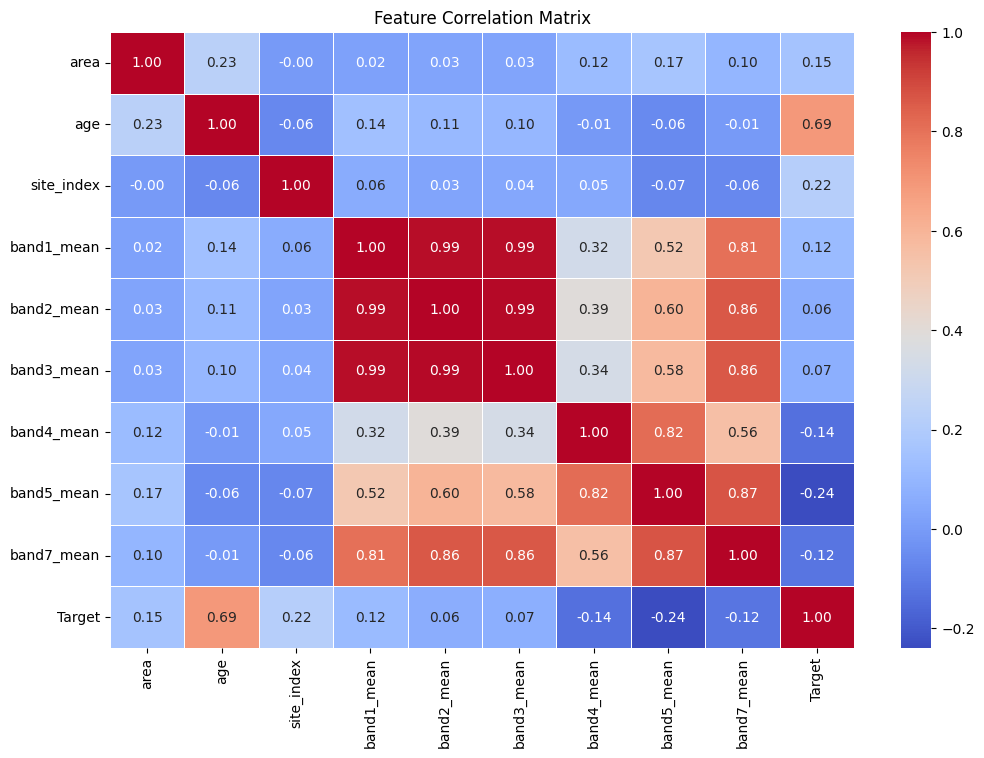

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
# Correlation Analysis
print("\n\033[1m1. Correlation Analysis\033[0m")
numeric_df = df.select_dtypes(include=[np.number])

# Pearson correlation
pearson_corr = numeric_df.corr()
print("\nPearson Correlation Matrix:")
display(pearson_corr)

# Spearman correlation (for non-linear relationships)
spearman_corr = numeric_df.corr(method='spearman')
print("\nSpearman Rank Correlation Matrix:")
display(spearman_corr)


1. Correlation Analysis

Pearson Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.231364,-0.003540,0.020924,0.030942,0.027399,0.119873,0.165566,0.098329,0.154633
age,0.231364,1.000000,-0.060307,0.140203,0.112850,0.103594,-0.008022,-0.055940,-0.005756,0.692056
site_index,-0.003540,-0.060307,1.000000,0.058555,0.028014,0.039007,0.045125,-0.069441,-0.060608,0.219984
band1_mean,0.020924,0.140203,0.058555,1.000000,0.987459,0.989245,0.323357,0.516815,0.805267,0.115859
band2_mean,0.030942,0.112850,0.028014,0.987459,1.000000,0.994283,0.393906,0.601437,0.862561,0.062973
band3_mean,0.027399,0.103594,0.039007,0.989245,0.994283,1.000000,0.337231,0.576497,0.862780,0.068490
band4_mean,0.119873,-0.008022,0.045125,0.323357,0.393906,0.337231,1.000000,0.815983,0.558893,-0.136642
band5_mean,0.165566,-0.055940,-0.069441,0.516815,0.601437,0.576497,0.815983,1.000000,0.870213,-0.239236
band7_mean,0.098329,-0.005756,-0.060608,0.805267,0.862561,0.862780,0.558893,0.870213,1.000000,-0.120668
Target,0.154633,0.692056,0.219984,0.115859,0.062973,0.068490,-0.136642,-0.239236,-0.120668,1.000000



Spearman Rank Correlation Matrix:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
area,1.000000,0.283037,0.022876,0.213706,0.189512,0.208398,0.159875,0.226184,0.231779,0.226292
age,0.283037,1.000000,-0.038502,0.288769,0.240152,0.201699,0.001891,-0.038970,0.040546,0.664862
site_index,0.022876,-0.038502,1.000000,-0.176554,-0.242914,-0.211765,-0.001725,-0.120921,-0.181714,0.336020
band1_mean,0.213706,0.288769,-0.176554,1.000000,0.839283,0.903691,0.289858,0.413800,0.595250,0.147065
band2_mean,0.189512,0.240152,-0.242914,0.839283,1.000000,0.920707,0.482088,0.595893,0.751582,0.025151
band3_mean,0.208398,0.201699,-0.211765,0.903691,0.920707,1.000000,0.304499,0.503779,0.717333,0.029429
band4_mean,0.159875,0.001891,-0.001725,0.289858,0.482088,0.304499,1.000000,0.838799,0.656505,-0.143543
band5_mean,0.226184,-0.038970,-0.120921,0.413800,0.595893,0.503779,0.838799,1.000000,0.909992,-0.240114
band7_mean,0.231779,0.040546,-0.181714,0.595250,0.751582,0.717333,0.656505,0.909992,1.000000,-0.173321
Target,0.226292,0.664862,0.336020,0.147065,0.025151,0.029429,-0.143543,-0.240114,-0.173321,1.000000



2. Visual Relationships


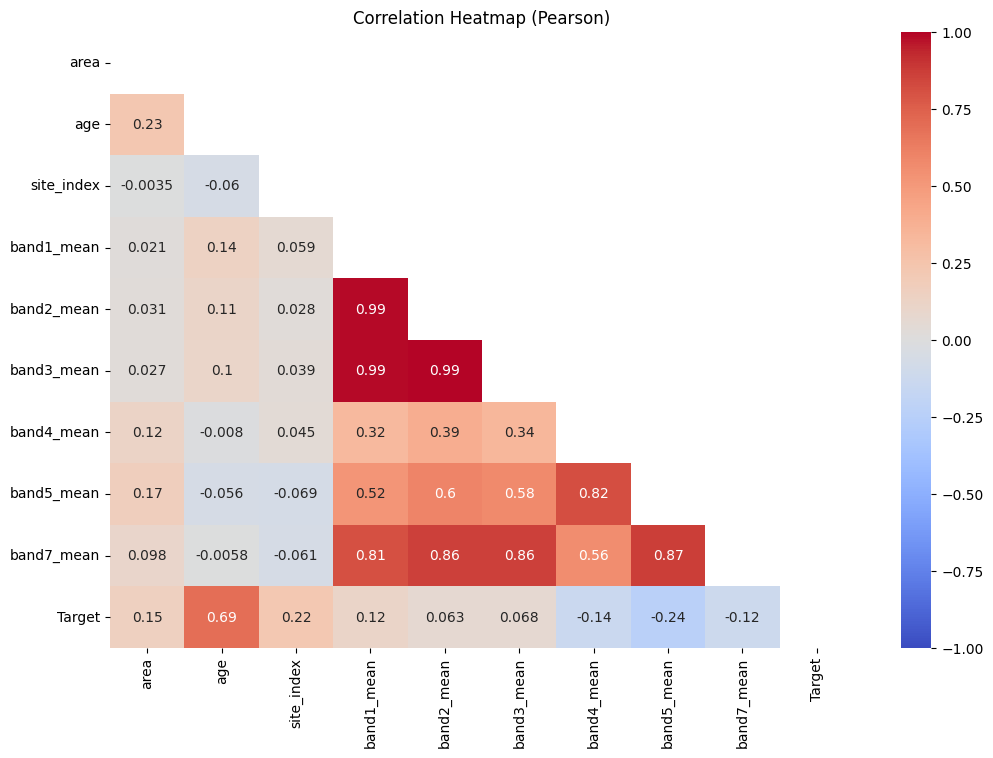

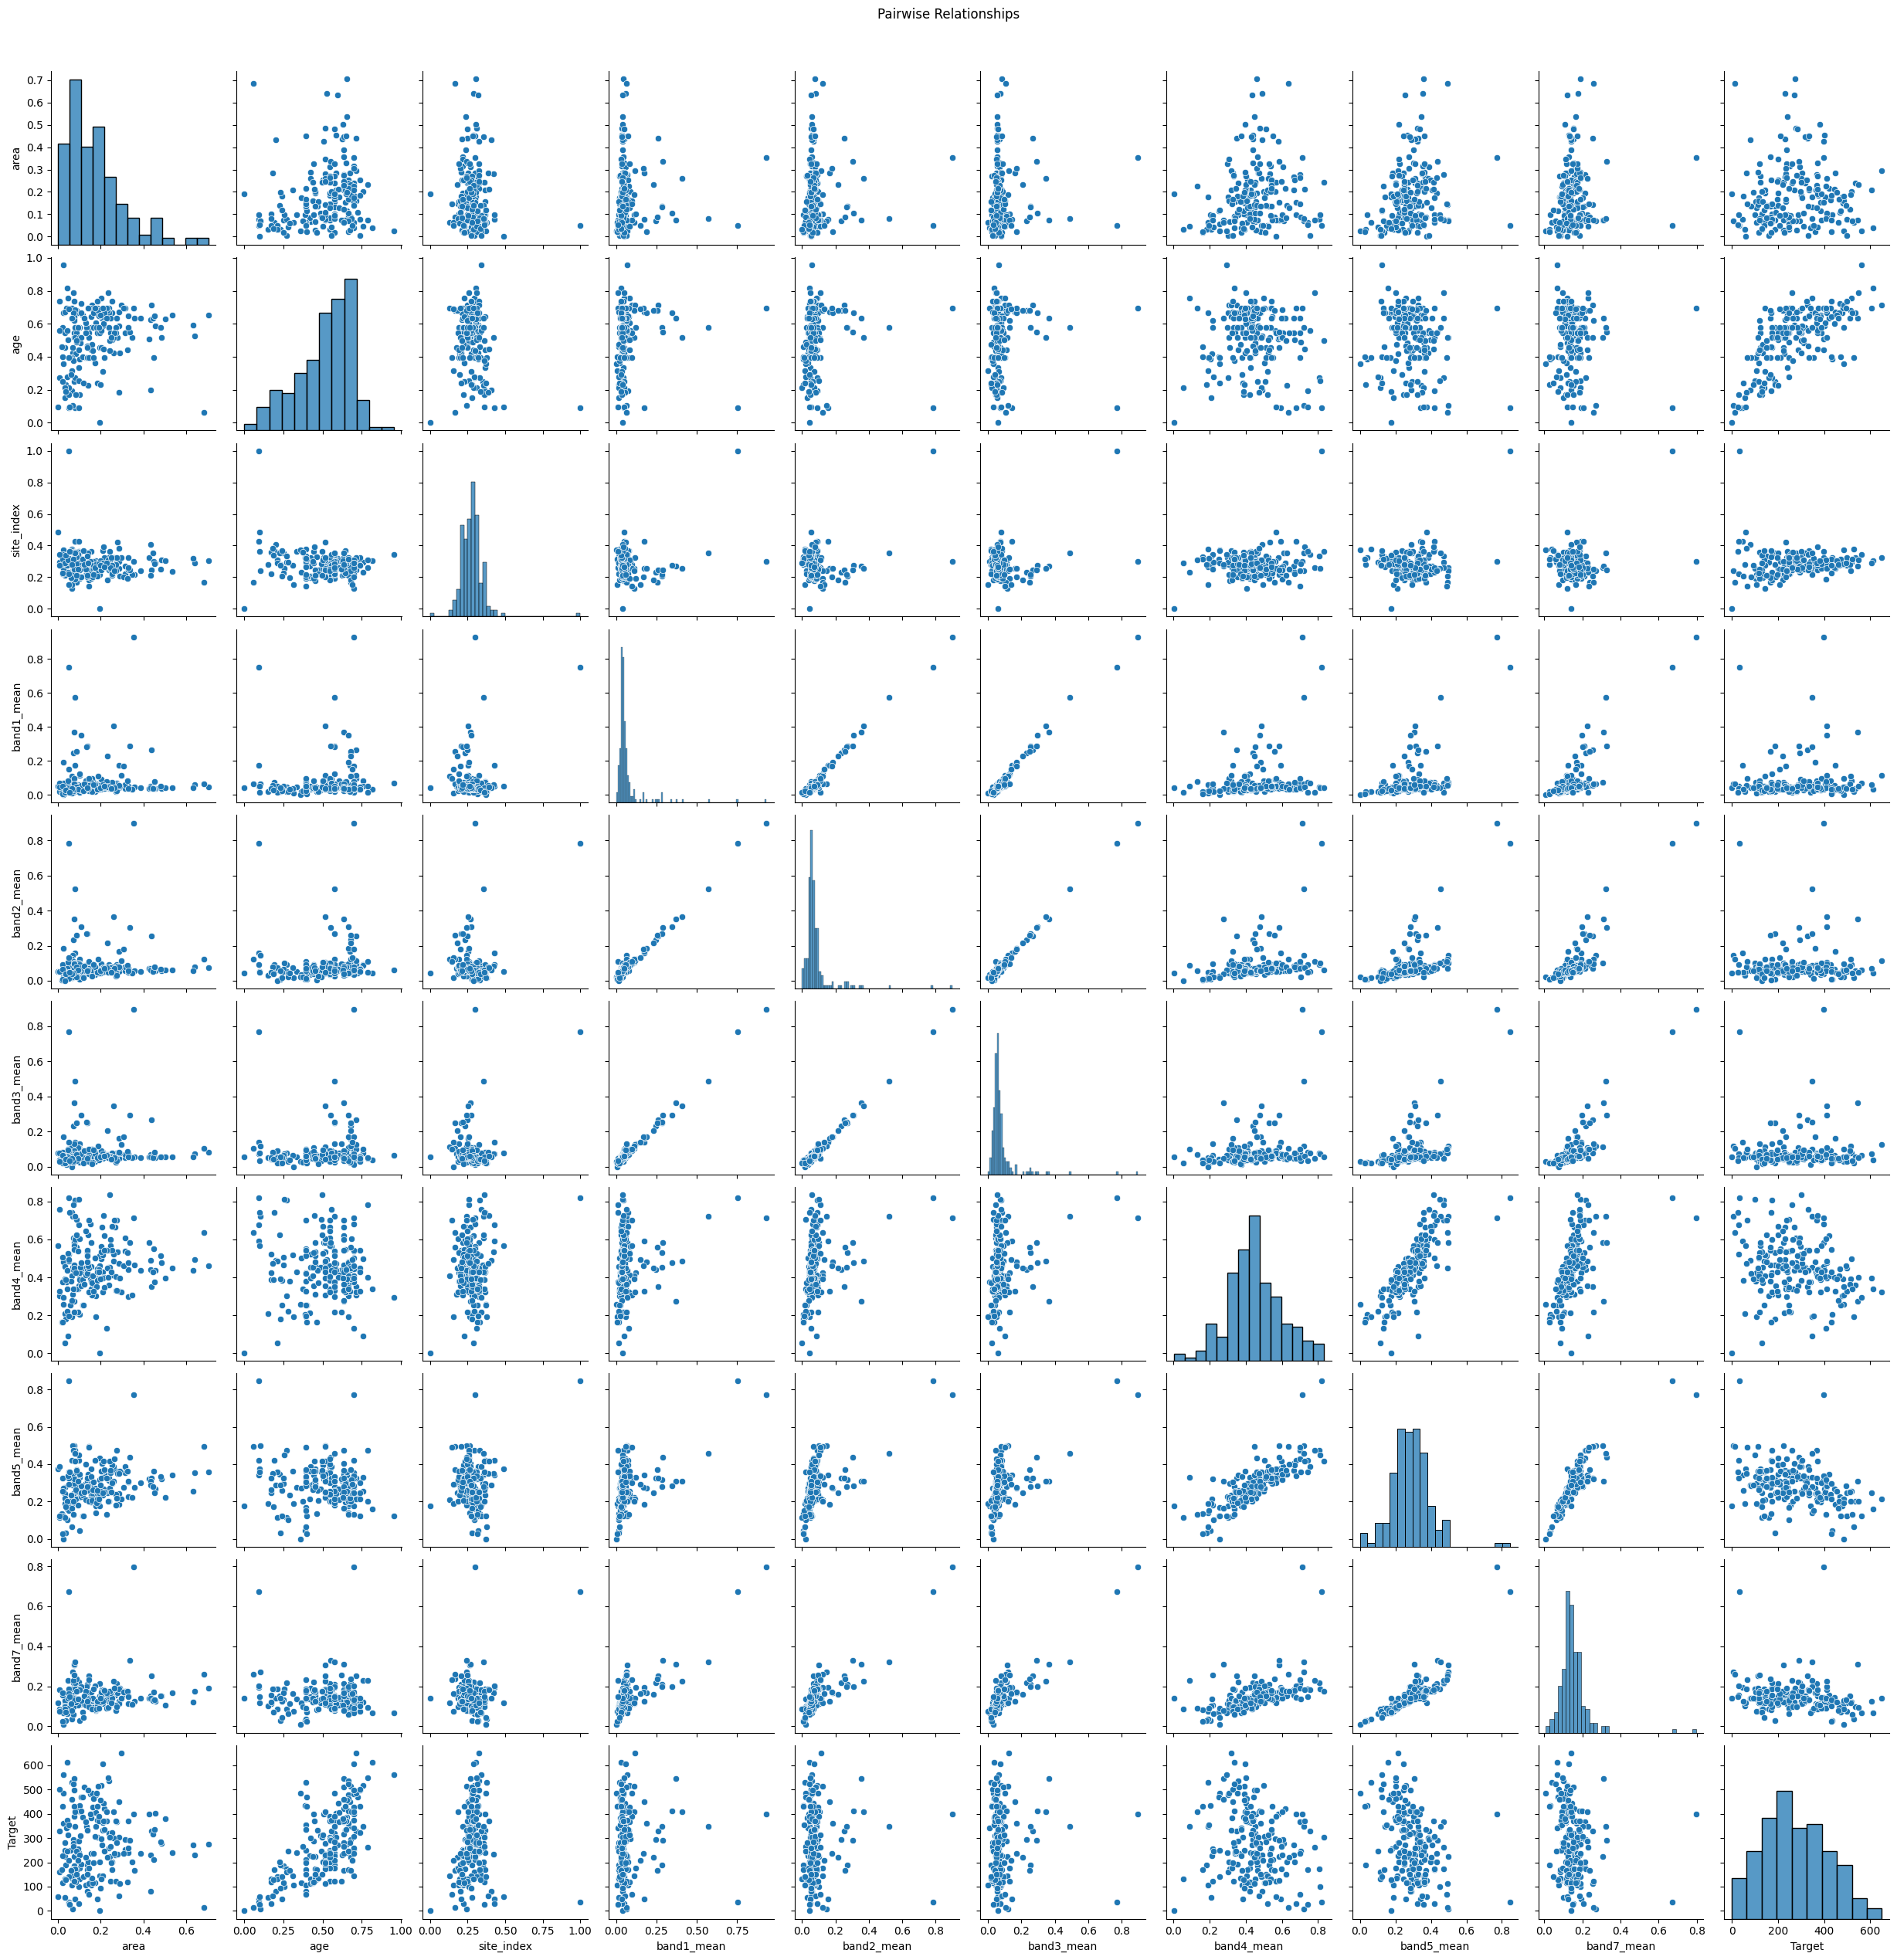

In [12]:
# Visualization
print("\n\033[1m2. Visual Relationships\033[0m")

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(pearson_corr)))
plt.title('Correlation Heatmap (Pearson)')
plt.show()

# Pairplot for multivariate analysis
sns.pairplot(df.sample(min(200, len(df)), random_state=1))
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [13]:
# Statistical Testing
print("\n\033[1m3. Statistical Significance Testing\033[0m")

# For 2 numeric variables
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    r, p = stats.pearsonr(df[col1], df[col2])
    print(f"\nPearson test between {col1} and {col2}:")
    print(f"Correlation Coefficient: {r:.3f}")
    print(f"P-value: {p:.4f}")


3. Statistical Significance Testing

Pearson test between area and age:
Correlation Coefficient: 0.231
P-value: 0.0000


In [14]:
# Categorical Relationships
print("\n\033[1m4. Categorical Analysis\033[0m")

# For categorical vs numerical
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
if len(categorical_cols) > 0 and len(numeric_df.columns) > 0:
    cat_var = categorical_cols[0]
    num_var = numeric_df.columns[0]

    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_var, y=num_var, data=df)
    plt.title(f'{cat_var} vs {num_var}')
    plt.xticks(rotation=45)
    plt.show()


4. Categorical Analysis



5. Advanced Relationships


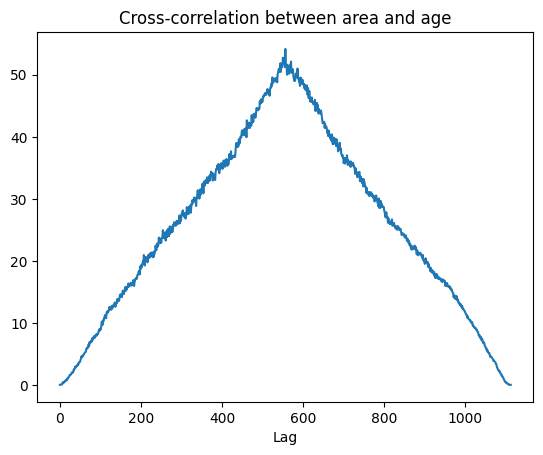

In [15]:
print("\n\033[1m5. Advanced Relationships\033[0m")

# Cross-correlation (lagged relationships)
if len(numeric_df.columns) >= 2:
    col1, col2 = numeric_df.columns[:2]
    cross_corr = np.correlate(df[col1], df[col2], mode='full')
    plt.plot(cross_corr)
    plt.title(f'Cross-correlation between {col1} and {col2}')
    plt.xlabel('Lag')
    plt.show()

# Model Training

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv(input_data['dataset_path'])

X = data.drop("Target", axis=1).values
y = data["Target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ### not scale x

# Normalize the target variable
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()


In [19]:
# 2. Define the Sparse Autoencoder Model in TensorFlow/Keras
input_dim = X_train.shape[1]
latent_dim = 16  # tune this based on dataset
#### hpo here

#input
input_layer = keras.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.2)(encoded)
latent = layers.Dense(latent_dim, activation='linear',
                      activity_regularizer=regularizers.l1(1e-3))(encoded)
### ## activity_regularizer, lr, do HPO,
### start final report

# Decoder
decoded = layers.Dense(64, activation='relu')(latent)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=decoded, name="sparse_autoencoder")
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "sparse_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,865 (15.10 KB)

 Trainable params: 3,609 (14.10 KB)

 Non-trainable params: 256 (1.00 KB)

In [20]:
# Training the autoencoder
ae_epochs = 100
batch_size = 32

autoencoder.fit(X_train, X_train,
                epochs=ae_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_split=0.1,
                verbose=1)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.0245 - val_loss: 1.0819
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2013 - val_loss: 0.9736
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.6650 - val_loss: 0.8983
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.6273 - val_loss: 0.8377
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3968 - val_loss: 0.8209
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4354 - val_loss: 0.7976
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2880 - val_loss: 0.7759
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2562 - val_loss: 0.7452
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1793 - val_loss: 0.7121
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1908 - val_loss: 0.6758
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1855 - val_loss: 0.6492
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

In [21]:
# 4. Create the Encoder Model for Feature Extraction
# Create a model to extract the latent features
encoder = keras.Model(inputs=input_layer, outputs=latent, name="encoder")
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [22]:
# 5. Build and Train a Downstream Regression Model for AGB Prediction
reg_input = keras.Input(shape=(latent_dim,))
## improve the structure
x = layers.Dense(32, activation='relu')(reg_input)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
reg_output = layers.Dense(1, activation='linear')(x)

regressor = keras.Model(inputs=reg_input, outputs=reg_output, name="regressor")
regressor.compile(optimizer='adam', loss='mse', metrics=['mae'])
regressor.summary()

reg_epochs = 300
regressor.fit(latent_train, y_train,
              epochs=reg_epochs,
              batch_size=32,
              validation_split=0.1,
              verbose=1)

Model: "regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 96 (384.00 B)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 5.4804 - mae: 1.8434 - val_loss: 1.0684 - val_mae: 0.8339
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3574 - mae: 1.5794 - val_loss: 0.9940 - val_mae: 0.8060
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6614 - mae: 1.2866 - val_loss: 0.9428 - val_mae: 0.7861
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6779 - mae: 1.2073 - val_loss: 0.9004 - val_mae: 0.7724
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8141 - mae: 1.0623 - val_loss: 0.8661 - val_mae: 0.7606
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6011 - mae: 0.9772 - val_loss: 0.8341 - val_mae: 0.7471
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4429 - mae: 0.9338 - val_loss: 0.8126 - val_mae: 0.7379
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5606 - mae: 0.9587 - val_loss: 0.7980 - val_mae: 0.7343
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7

In [25]:
y_pred_scaled = regressor.predict(latent_test).flatten()
# Inverse transform predictions and true values to get original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse_value = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)
print(f"Test MSE for AGB prediction: {mse_value:.4f}")
print(f"Test R^2 for AGB prediction: {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test MSE for AGB prediction: 6341.0480
Test R^2 for AGB prediction: 0.6376


In [ ]:
# make graphs

In [36]:
# Try 2
#load data
data = pd.read_csv(input_data['dataset_path'])
X = data.drop("Target", axis=1).values
y = data["Target"].values

# 2. Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optionally, normalize the target (helpful if target values vary widely)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

input_dim = X_train.shape[1]

In [37]:
def build_autoencoder(hp):
    # Hyperparameters to tune
    units = hp.Int('units', min_value=32, max_value=128, step=4)
    latent_dim = hp.Int('latent_dim', min_value=8, max_value=64, step=4)
    dropout_rate = hp.Float('dropout_rate', 0.1, 0.7, step=0.1)
    l1_reg = hp.Float('l1', 1e-4, 1e-2, sampling='log')
    lr = hp.Choice('lr', [1e-3, 1e-4])

    # Input layer
    input_layer = keras.Input(shape=(input_dim,))

    # Encoder: First hidden layer
    x = layers.Dense(units, activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Encoder: Second hidden layer (added layer)
    x = layers.Dense(units // 2, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Latent layer with L1 activity regularizer to enforce sparsity
    latent = layers.Dense(latent_dim, activation='linear',
                          activity_regularizer=regularizers.l1(l1_reg),
                          name="latent")(x)

    # Decoder: First hidden layer (mirroring the encoder)
    x = layers.Dense(units // 2, activation='relu')(latent)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Decoder: Second hidden layer (mirroring the encoder)
    x = layers.Dense(units, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Output layer: reconstruct the input
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = keras.Model(inputs=input_layer, outputs=output_layer, name="sparse_autoencoder")
    autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mse')
    return autoencoder


In [38]:
tuner = kt.Hyperband(build_autoencoder,
                     objective='val_loss',
                     max_epochs=50,
                     factor=3,
                     directory='autoencoder_tuning',
                     project_name='sparse_ae')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, X_train, epochs=50, validation_split=0.1, callbacks=[early_stop], verbose=1)

# Get the best hyperparameters and display them
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hp.values)

# Build the autoencoder with the best hyperparameters and train it
autoencoder = build_autoencoder(best_hp)
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          validation_split=0.1,
                          callbacks=[early_stop],
                          verbose=1)

# Confirm that it’s a Sparse Autoencoder (the latent layer includes an L1 regularizer)
print("Sparse Autoencoder defined with L1 regularization on the latent layer (named 'latent').")

Reloading Tuner from autoencoder_tuning/sparse_ae/tuner0.json
Best Hyperparameters:
{'units': 64, 'latent_dim': 40, 'dropout_rate': 0.4, 'l1': 0.00011227880815579792, 'lr': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0069'}
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 4.0112 - val_loss: 1.0572
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3518 - val_loss: 1.0275
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1897 - val_loss: 1.0061
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8834 - val_loss: 1.0012
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3666 - val_loss: 0.9904
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1477 - val_loss: 0.9780
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0214 - val_loss: 0.9671
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8466 - val_loss: 0.9454
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━

In [41]:
# 6. Create the Encoder Model for Feature Extraction
encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("latent").output)
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [42]:
# Using RF instead of NN
# 7. Downstream Regression: Random Forest with Cross Validation
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Use 5-fold cross validation on the latent features
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_regressor, latent_train, y_train, cv=kf, scoring='r2')
print(f"Random Forest CV R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {np.mean(cv_scores):.4f}")

# Train RF on the entire training latent features and evaluate on the test set
rf_regressor.fit(latent_train, y_train)
y_pred_rf_scaled = rf_regressor.predict(latent_test)
# Inverse transform predictions to original scale
y_pred_rf = y_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).flatten()
y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse_rf = mean_squared_error(y_test_inv, y_pred_rf)
r2_rf = r2_score(y_test_inv, y_pred_rf)
print(f"Random Forest Test MSE: {mse_rf:.4f}")
print(f"Random Forest Test R^2: {r2_rf:.4f}")

Random Forest CV R^2 scores: [0.64076392 0.54333467 0.60850966 0.69175336 0.73253923]
Mean CV R^2: 0.6434
Random Forest Test MSE: 8287.8984
Random Forest Test R^2: 0.5263


In [43]:
# 8. Comparing with a Neural Network Regressor using CV
def build_regressor():
    reg_input = keras.Input(shape=(best_hp.get('latent_dim'),))
    x = layers.Dense(32, activation='relu')(reg_input)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(16, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    reg_output = layers.Dense(1, activation='linear')(x)
    model = keras.Model(inputs=reg_input, outputs=reg_output, name="nn_regressor")
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Using KFold CV for the NN regressor
num_folds = 5
fold_no = 1
nn_cv_scores = []

for train_idx, val_idx in kf.split(latent_train):
    X_tr, X_val = latent_train[train_idx], latent_train[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    nn_model = build_regressor()
    early_stop_nn = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    nn_model.fit(X_tr, y_tr, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                 callbacks=[early_stop_nn], verbose=0)

    y_val_pred = nn_model.predict(X_val).flatten()
    r2_val = r2_score(y_val, y_val_pred)
    nn_cv_scores.append(r2_val)
    print(f"Fold {fold_no} NN Regressor R^2: {r2_val:.4f}")
    fold_no += 1

print(f"Mean NN Regressor CV R^2: {np.mean(nn_cv_scores):.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Fold 1 NN Regressor R^2: 0.5464
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Fold 2 NN Regressor R^2: 0.5664
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Fold 3 NN Regressor R^2: 0.5456
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Fold 4 NN Regressor R^2: 0.6105
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Fold 5 NN Regressor R^2: 0.6668
Mean NN Regressor CV R^2: 0.5871
